<a href="https://colab.research.google.com/github/Fredf23/TatChim/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Ridge_Regression_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/ANN_TchP/X_bp.xlsx")

In [ ]:
# !!! Взято из ноутбука TestTrans.ipynb

# Разделение данных на входные и целевые признаки
#input_features = data[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'Количество отвердителя, м.%',
#                       'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2']]
#target_features = data[['модуль упругости, ГПа', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
#                        'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]

columns = df.columns
index_input = [1, 2, 4, 5, -1]
index_targt = [3, 6, 7, 8, 9]

df_input = df.iloc[:, index_input]
df_target = df.iloc[:, index_targt]

In [ ]:
df_target.head(7)

,"модуль упругости, ГПа","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
0,738.736842,100.000000,210.0,70.0,3000.0
1,738.736842,284.615385,210.0,70.0,3000.0
2,738.736842,284.615385,210.0,70.0,3000.0
3,738.736842,300.000000,210.0,70.0,3000.0
4,753.000000,284.615385,210.0,70.0,3000.0
5,748.000000,284.615385,210.0,70.0,3000.0
6,807.000000,284.615385,210.0,70.0,3000.0


In [ ]:
x_val = df_input.values
y_val = df_target.values

# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x_val, y_val,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])


In [ ]:
param_grid = {
    'poly__degree': [1, 2, 3], # степени полиномов
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0], # степени регуляризации
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'] # различные решатели
}


In [ ]:
# Создание GridSearchCV для поиска лучших параметров
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Обучение модели с использованием кросс-валидации
grid_search.fit(x_train, y_train)

# Лучшая модель и параметры
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
# тест
y_pred = best_model.predict(x_test)

In [ ]:
# расчет метрики
mse = mean_squared_error(y_test, y_pred)
print(f"mse: {mse}")

mse: 83662.87142546059


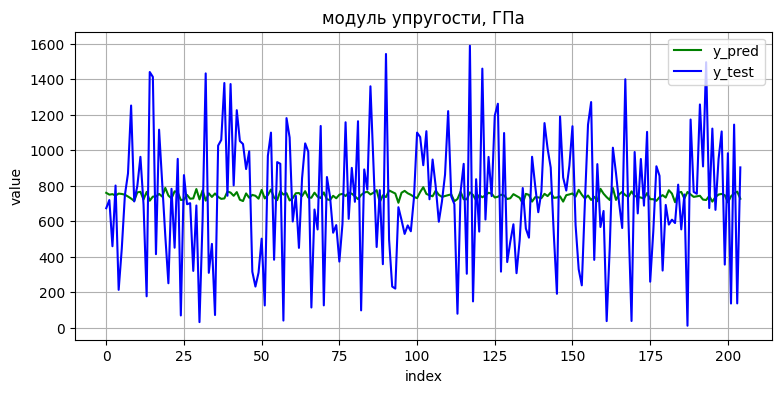

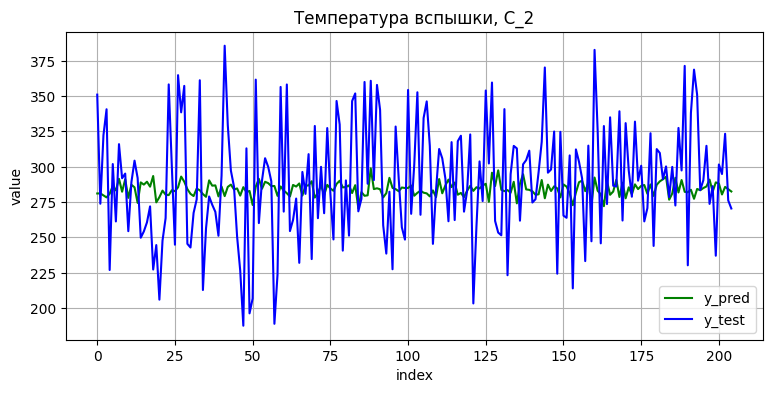

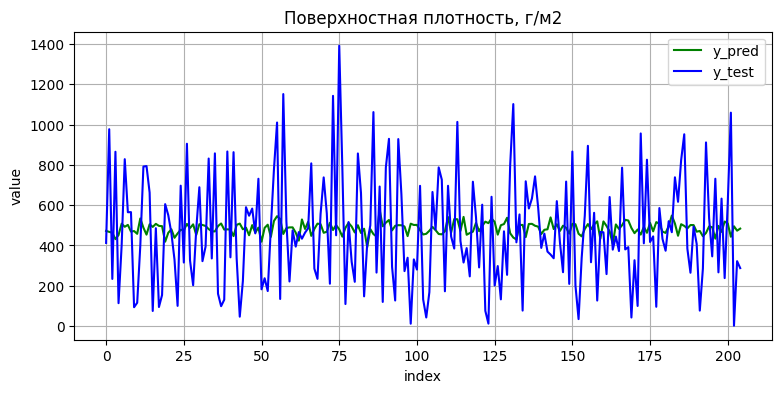

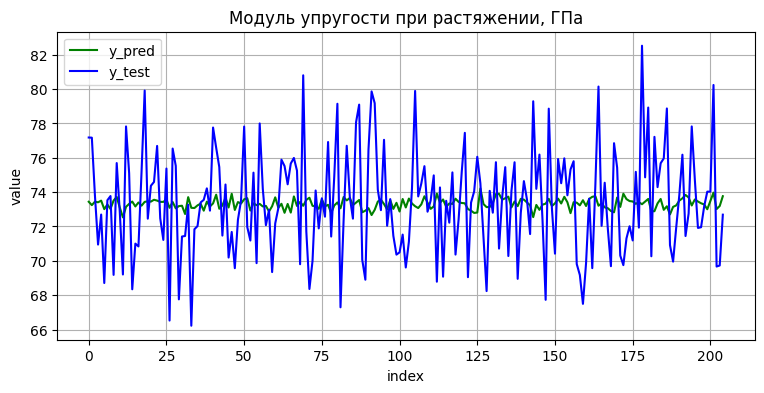

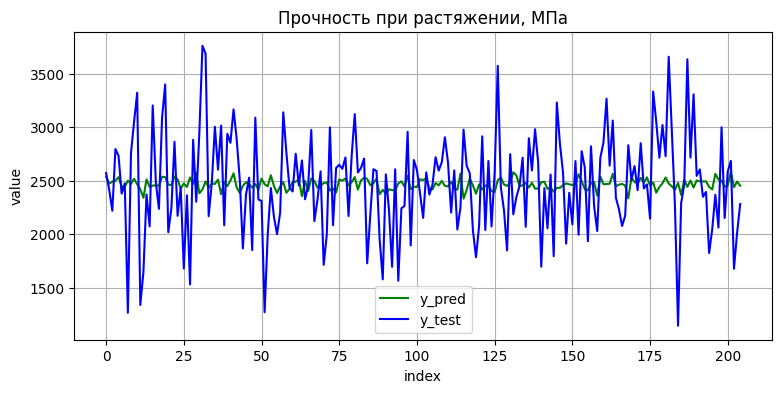

In [ ]:
# Создание графиков по каждому столбцу
for i in range(y_pred.shape[-1]):
    plt.figure(figsize=(9, 4))
    plt.plot(y_pred[:, i], color='g', label="y_pred")
    plt.plot(y_test[:, i], color='b', label="y_test")
    plt.title(columns[index_targt[i]])
    plt.xlabel('index')
    plt.ylabel('value')
    plt.legend()
    plt.grid(True)
    plt.show()

(205, 5)